In [2]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read data 
data=pd.read_csv("CC GENERAL.csv", sep=",")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
#delete the unnecessary column
data.drop("CUST_ID" ,axis = 1 , inplace = True)


In [7]:
#Fill those null values with mean 

x= data["CREDIT_LIMIT"].mean()
data['CREDIT_LIMIT'].fillna(x, inplace= True )

In [8]:
x= data["MINIMUM_PAYMENTS"].mean()
data['MINIMUM_PAYMENTS'].fillna(x, inplace= True )

In [9]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [63]:
#Agglomerative cluster plot

from sklearn.cluster import AgglomerativeClustering  #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [64]:
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

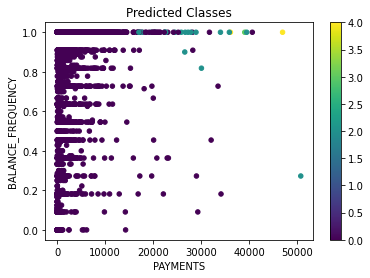

In [65]:
#Plot the clusters
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PAYMENTS'] , data ["BALANCE_FREQUENCY"] , c= agglomerative[0], s=20)
ax.set_title("Predicted Classes")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("BALANCE_FREQUENCY")
plt.colorbar(scatter)

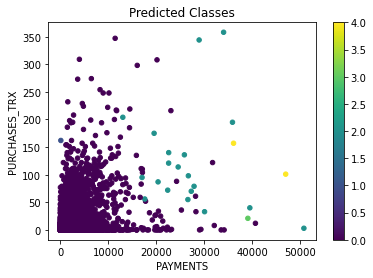

In [66]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PAYMENTS'] , data ["PURCHASES_TRX"] , c= agglomerative[0], s=20)
ax.set_title("Predicted Classes")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("PURCHASES_TRX")
plt.colorbar(scatter)

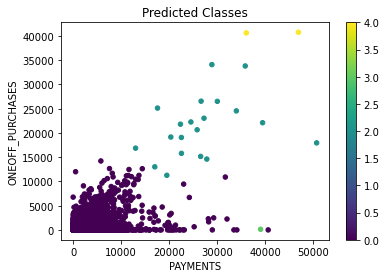

In [67]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PAYMENTS'] , data ["ONEOFF_PURCHASES"] , c= agglomerative[0], s=20)
ax.set_title("Predicted Classes")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("ONEOFF_PURCHASES")
plt.colorbar(scatter)

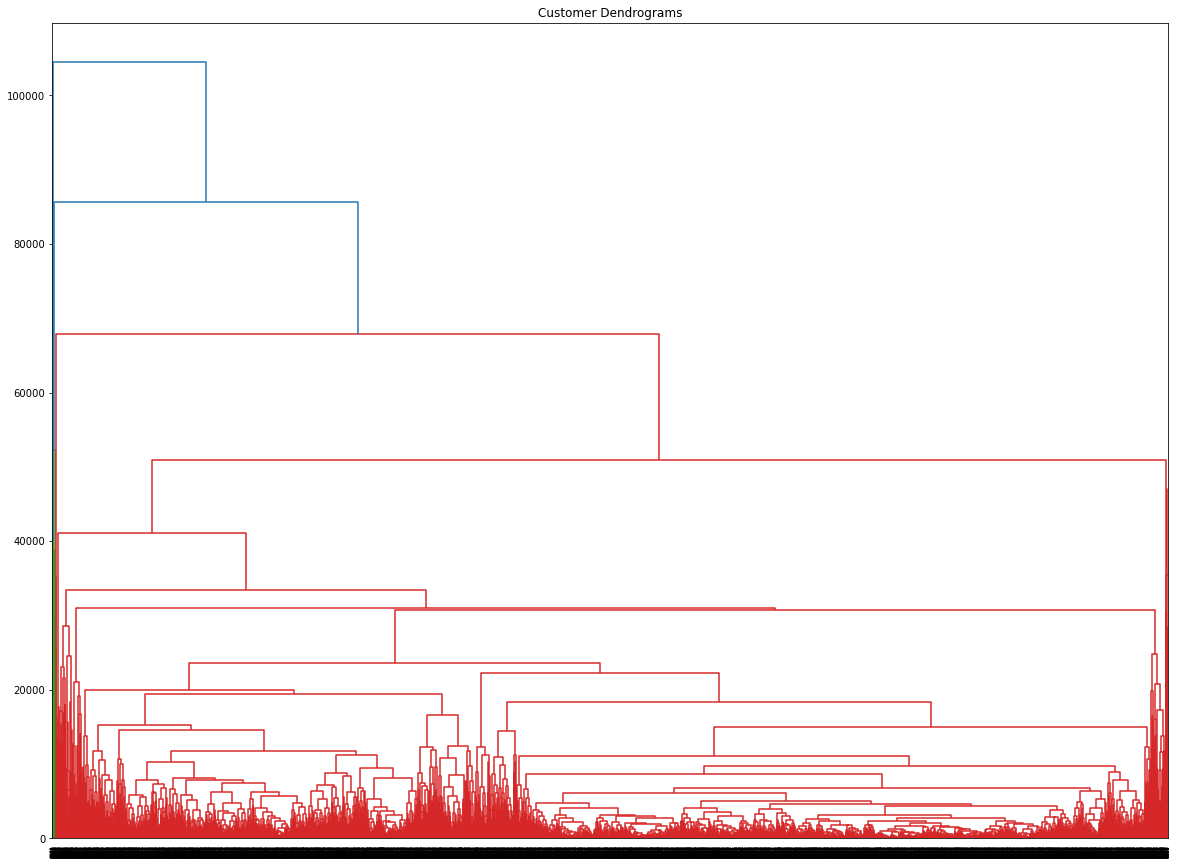

In [73]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,15))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [68]:
#K-means

from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
kmeans.predict(data)

label=pd.DataFrame(kmeans.labels_) #print the label of each point in our data after the clustering is done.
label


,0
0,0
1,4
2,4
3,4
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [69]:
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[3.99680289e-15 7.87525310e+02 8.49448814e-01 5.09892313e+02
  2.49369084e+02 2.60819413e+02 4.83252005e+02 4.51462729e-01
  1.30904213e-01 3.47030392e-01 1.09189353e-01 2.28054545e+00
  9.50563636e+00 2.22747849e+03 9.04173576e+02 5.26793626e+02
  1.48620153e-01]
 [1.11195929e+00 5.48720526e+03 9.54910300e-01 2.40789541e+03
  1.55343184e+03 8.54576730e+02 4.13952954e+03 5.31917954e-01
  3.25465421e-01 4.01272510e-01 3.11313742e-01 9.66793893e+00
  3.05114504e+01 1.13739880e+04 5.66199017e+03 1.97499024e+03
  1.07193598e-01]
 [5.71428571e-01 4.05814769e+03 9.88636375e-01 1.02737875e+03
  1.18389464e+02 9.08989286e+02 9.22757849e+02 4.71320321e-01
  3.92315536e-02 4.41152625e-01 1.05654714e-01 3.01785714e+00
  1.86250000e+01 4.26785714e+03 1.62493914e+03 2.27600316e+04
  1.48808929e-03]
 [2.00000000e+00 5.14958549e+03 9.04434585e-01 1.95473678e+04
  1.43043888e+04 5.24297902e+03 4.86981405e+03 8.28861756e-01
  6.90243927e-01 6.98373976e-01 1.40243878e-01 7.80487805e+00
  1.10658537e+02

In [28]:
data.insert(0,"label", label)

In [29]:
data

,label,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,1,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,0,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,0,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000
8947,0,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,0,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


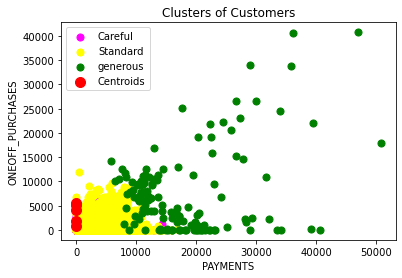

In [70]:
#K-means plot

plt.scatter(data["PAYMENTS"][data.label  == 0],          
            data["ONEOFF_PURCHASES"][data.label == 0],s=50,c='magenta',label='Careful')
plt.scatter(data["PAYMENTS"][data.label == 1],
           data["ONEOFF_PURCHASES"][data.label == 1],s=50,c='yellow',label='Standard')
plt.scatter(data["PAYMENTS"][data.label == 2],
           data["ONEOFF_PURCHASES"][data.label == 2],s=50,c='green',label='generous')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PAYMENTS')
plt.ylabel('ONEOFF_PURCHASES')
plt.legend()
plt.show()

In [71]:
#K-best Value : The Elbow method code
sum_of_squared_distances = []
k = []
for i in range(1,15) :
    km = KMeans(n_clusters = i)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
    k.append(i)

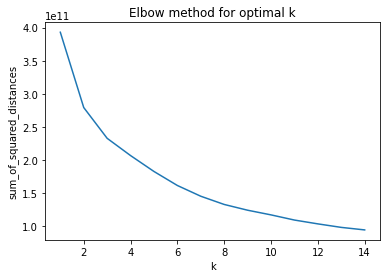

In [72]:
#plot The Elbow method code
plt.plot(k, sum_of_squared_distances )
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

In [ ]:
# in our case the optimal k is 2